<a href="https://colab.research.google.com/github/mynameiszainmalik/AI-BUILDER/blob/main/Copy_of_FASHION_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: CUDA Setup and Verification
import torch

# Check CUDA availability
print(f"CUDA is available: {torch.cuda.is_available()}")
print(f"Current CUDA device: {torch.cuda.get_device_name(0)}")

# Set default device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Print GPU memory info if available
if torch.cuda.is_available():
    print(f"Total GPU memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    print(f"GPU Device Count: {torch.cuda.device_count()}")

CUDA is available: True
Current CUDA device: Tesla T4
Using device: cuda
Total GPU memory: 15.83 GB
GPU Device Count: 1


In [ ]:

!pwd  # Should show /content
!ls -la /content/kaggle.json  # Verify kaggle.json exists

/content
-rw-r--r-- 1 root root 73 Jun  1 10:01 /content/kaggle.json


In [ ]:
# Cell 2: Setup Kaggle credentials
!mkdir -p ~/.kaggle  # This will create the directory in the correct location
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Cell 3: Verify setup
!ls -la ~/.kaggle/kaggle.json
# Test Kaggle API
!kaggle datasets list --sort-by hottest

-rw------- 1 root root 73 Jun  1 10:06 /root/.kaggle/kaggle.json
ref                                                       title                                                 size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ---------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
adilshamim8/social-media-addiction-vs-relationships       Students' Social Media Addiction                      7851  2025-05-10 14:38:02.713000           9500        136  1.0              
jayaantanaath/student-habits-vs-academic-performance      Student Habits vs Academic Performance               19512  2025-04-12 10:49:08.663000          37208        654  1.0              
rakeshkapilavai/extrovert-vs-introvert-behavior-data      Extrovert vs. Introvert Behavior Data                15392  2025-05-21 04:26:52.443000           2849         70  1.0

In [ ]:
# Cell 2: Library Installation and Import Check
import sys
import subprocess

# Function to install missing packages
def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# List of required packages
required_packages = [
    'torch',
    'torchvision',
    'numpy',
    'pandas',
    'matplotlib',
    'tqdm'
]

# Check and install missing packages
for package in required_packages:
    try:
        __import__(package)
        print(f"✓ {package} is already installed")
    except ImportError:
        print(f"Installing {package}...")
        install_package(package)

# Import necessary libraries
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

print("\nAll required libraries are installed and imported successfully!")

✓ torch is already installed
✓ torchvision is already installed
✓ numpy is already installed
✓ pandas is already installed
✓ matplotlib is already installed
✓ tqdm is already installed

All required libraries are installed and imported successfully!


In [ ]:
# Cell 3: Kaggle Dataset Setup Guide

"""
Step 1: Set up Kaggle API credentials
1. Go to kaggle.com and sign in
2. Go to 'Account' tab
3. Scroll to API section and click 'Create New API Token'
4. This will download 'kaggle.json' file
5. Create .kaggle directory and move the file:
"""

# Instructions for uploading kaggle.json
print("IMPORTANT: Upload your kaggle.json file to the session.")
print("You can do this by:")
print("1. Drag and drop the kaggle.json file to Colab's file browser")
print("2. Run the following command to move it to the right location:")
print("   !cp kaggle.json ~/.kaggle/")
print("3. Set appropriate permissions:")
print("   !chmod 600 ~/.kaggle/kaggle.json")

# Download Fashion MNIST dataset
!kaggle datasets download -d zalando-research/fashionmnist

# Extract the downloaded zip file
!unzip fashionmnist.zip

# Basic dataset inspection
import pandas as pd

# Load and peek at the data
try:
    train_data = pd.read_csv('fashion-mnist_train.csv')
    test_data = pd.read_csv('fashion-mnist_test.csv')

    print("\nDataset Information:")
    print(f"Training set shape: {train_data.shape}")
    print(f"Test set shape: {test_data.shape}")
    print("\nFirst few columns of training data:")
    print(train_data.columns[:10])

except FileNotFoundError:
    print("\nPlease ensure you've completed the Kaggle API setup steps above!")

IMPORTANT: Upload your kaggle.json file to the session.
You can do this by:
1. Drag and drop the kaggle.json file to Colab's file browser
2. Run the following command to move it to the right location:
   !cp kaggle.json ~/.kaggle/
3. Set appropriate permissions:
   !chmod 600 ~/.kaggle/kaggle.json
Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist
License(s): other
  0% 0.00/68.8M [00:00<?, ?B/s]
100% 68.8M/68.8M [00:00<00:00, 1.13GB/s]
Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  

Dataset Information:
Training set shape: (60000, 785)
Test set shape: (10000, 785)

First few columns of training data:
Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9'],
      dtype='object')


In [ ]:
# Load and display the training data structure
import pandas as pd
import numpy as np

# Load the data
train_data = pd.read_csv('fashion-mnist_train.csv')

# Display first few rows with clear formatting
print("\nFirst 5 rows of the training dataset:")
print("\nShape of training data:", train_data.shape)  # Should show (60000, 785)
print("\nColumn names:", train_data.columns[:10], "...")  # Show first 10 column names
print("\nFirst 5 rows and 10 columns:")
print(train_data.iloc[:5, :10])  # Show first 5 rows and 10 columns

# Let's also verify the label at position (0,0)
print("\nValue at position (0,0) (first label):", train_data.iloc[0,0])
print("Class name for this label:", class_labels[train_data.iloc[0,0]])

# Show data types of columns
print("\nData types of columns:")
print(train_data.dtypes.head())

# Basic statistics of first few pixels
print("\nBasic statistics of first few columns:")
print(train_data.describe().iloc[:, :5])


First 5 rows of the training dataset:

Shape of training data: (60000, 785)

Column names: Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9'],
      dtype='object') ...

First 5 rows and 10 columns:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  
0       0  
1       0  
2       0  
3       0  
4       0  

Value at position (0,0) (first label): 2
Class name for this label: Pullover

Data types of columns:
label     int64
pixel1    int64
pixel2    int64
pixel3    int64
pixel4    int64
dtype: object

Basic statis

In [ ]:
# Cell 1: Data Understanding and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define class labels for Fashion MNIST
class_labels = {
    0: 'T-shirt/Top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

# Load the data
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

# Basic statistics
print("Dataset Overview:")
print(f"Training samples: {len(train_data)}")
print(f"Testing samples: {len(test_data)}")
print(f"Image dimensions: {int(np.sqrt(train_data.shape[1] - 1))}x{int(np.sqrt(train_data.shape[1] - 1))}")
print("\nClass Distribution in Training Set:")
print(train_data['label'].value_counts().sort_index().to_string())





Dataset Overview:
Training samples: 60000
Testing samples: 10000
Image dimensions: 28x28

Class Distribution in Training Set:
label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000


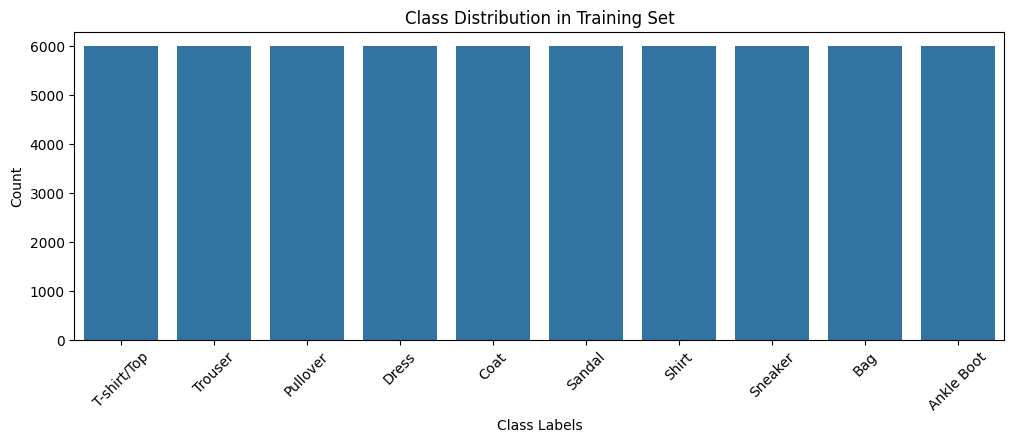

In [ ]:
# Visualize class distribution
plt.figure(figsize=(12, 4))
sns.countplot(data=train_data, x='label')

plt.title('Class Distribution in Training Set')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.xticks(range(10), [class_labels[i] for i in range(10)], rotation=45)
plt.show()

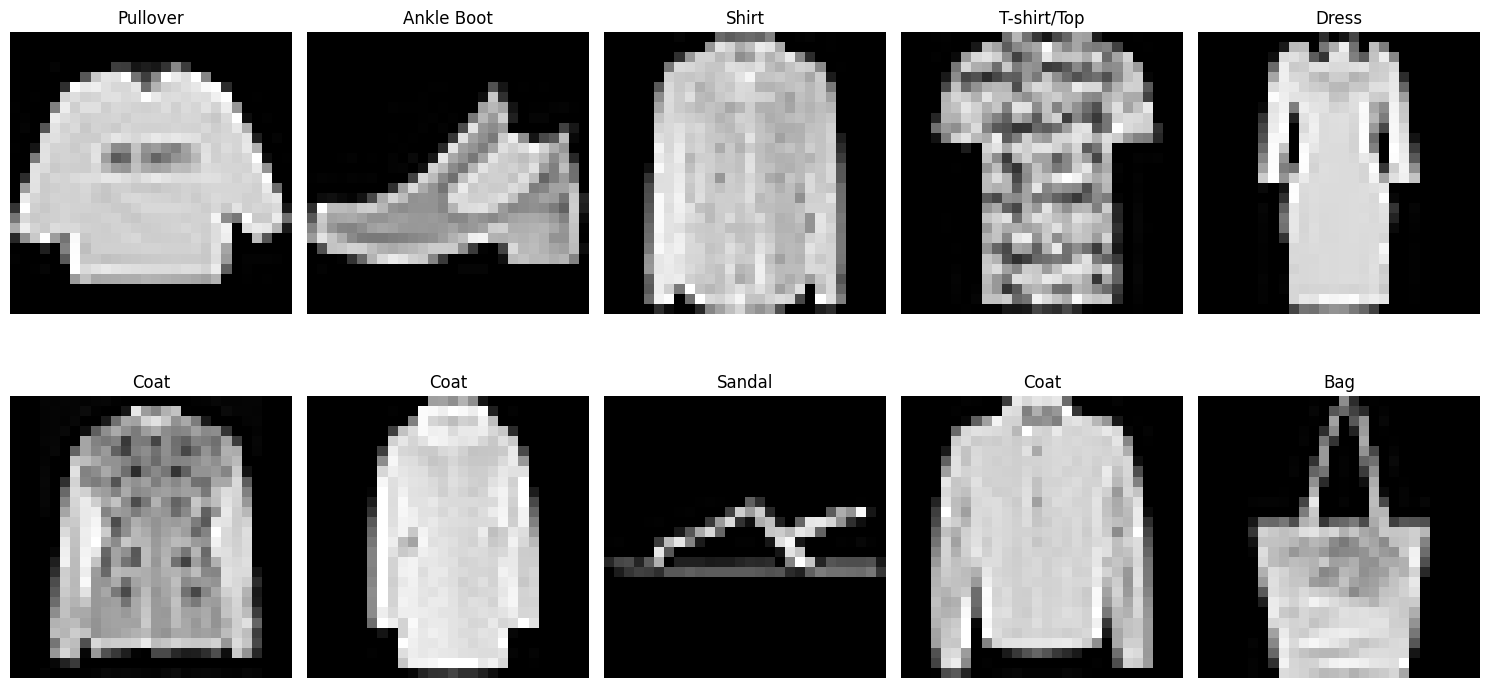

In [ ]:
# Visualize sample images
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = train_data.iloc[i, 1:].values.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f'{class_labels[train_data.iloc[i, 0]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()



In [ ]:
# Check for missing values
print("\nMissing Values Check:")
print(train_data.isnull().sum().sum())

# Check data statistics
print("\nPixel Value Statistics:")
print(train_data.iloc[:, 1:].describe())


Missing Values Check:
0

Pixel Value Statistics:
             pixel1        pixel2        pixel3        pixel4        pixel5  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.000900      0.006150      0.035333      0.101933      0.247967   
std        0.094689      0.271011      1.222324      2.452871      4.306912   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     36.000000    226.000000    164.000000    227.000000   

             pixel6        pixel7        pixel8        pixel9       pixel10  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.411467      0.805767      2.198283      5.682000     14.488767   
s

In [ ]:
# Cell 1: Import necessary libraries and set up data transformations
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split
import numpy as np

# Check if we're still on CUDA
print(f"Using CUDA: {torch.cuda.is_available()}")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Using CUDA: True
Device: cuda


In [ ]:
# Cell 2: Create Custom Dataset Class
class FashionMNISTDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

        # Get features and labels
        self.features = data.iloc[:, 1:].values.astype('float32')
        self.labels = data.iloc[:, 0].values

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Reshape to 28x28 image
        image = self.features[idx].reshape(28, 28)
        label = self.labels[idx]

        if self.transform:
            # Convert to PIL Image for transforms
            image = transforms.ToPILImage()(image)
            image = self.transform(image)

        return image, label

# Let's verify our Dataset class works
sample_dataset = FashionMNISTDataset(train_data[:5])  # Test with first 5 samples
print("\nTesting Dataset Class:")
print(f"Dataset size: {len(sample_dataset)}")
sample_image, sample_label = sample_dataset[0]
print(f"Sample image shape: {sample_image.shape}")
print(f"Sample image value range: [{sample_image.min():.3f}, {sample_image.max():.3f}]")
print(f"Sample label: {sample_label} ({class_labels[sample_label]})")


Testing Dataset Class:
Dataset size: 5
Sample image shape: (28, 28)
Sample image value range: [0.000, 255.000]
Sample label: 2 (Pullover)


In [ ]:
# Cell 3: Set up data transforms and split dataset (Final correction)
# Define transforms for training and validation
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts to tensor and scales to [0, 1]
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [-1,1]
])

# Split into train and validation sets (80-20 split)
train_df, val_df = train_test_split(
    train_data,
    test_size=0.2,
    random_state=42,
    stratify=train_data['label']  # Maintain class distribution in split
)

# Create datasets with transforms
train_dataset = FashionMNISTDataset(train_df, transform=transform)
val_dataset = FashionMNISTDataset(val_df, transform=transform)
test_dataset = FashionMNISTDataset(test_data, transform=transform)

# Verify transformation
sample_image, sample_label = train_dataset[0]
print("\nVerifying transformed dataset:")
print(f"Image shape: {sample_image.shape}")
print(f"Value range: [{sample_image.min():.3f}, {sample_image.max():.3f}]")
print(f"Label: {sample_label} ({class_labels[sample_label]})")

print("\nDataset Splits:")
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")


Verifying transformed dataset:
Image shape: torch.Size([1, 28, 28])
Value range: [-1.000, 1.000]
Label: 6 (Shirt)

Dataset Splits:
Training samples: 48000
Validation samples: 12000
Test samples: 10000


In [ ]:
# Cell 4: Create DataLoaders with proper batch size and settings
batch_size = 64  # Standard batch size for training

# Create data loaders with optimal settings for GPU training
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,  # Shuffle training data
    num_workers=2,  # Parallel data loading
    pin_memory=True  # Faster data transfer to GPU
)

val_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,  # No need to shuffle validation data
    num_workers=2,
    pin_memory=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

# Verify DataLoader output
for images, labels in train_loader:
    print("\nDataLoader Verification:")
    print(f"Batch shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")
    print(f"Value range: [{images.min():.3f}, {images.max():.3f}]")
    print(f"Sample labels: {labels[:5].tolist()}")
    break  # Just check first batch

print("\nDataLoader Sizes:")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")
print(f"Number of test batches: {len(test_loader)}")


DataLoader Verification:
Batch shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])
Value range: [-1.000, 1.000]
Sample labels: [4, 5, 6, 2, 5]

DataLoader Sizes:
Number of training batches: 750
Number of validation batches: 188
Number of test batches: 157


In [ ]:
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()

        # First Convolutional Block
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Second Convolutional Block
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Calculate size for fully connected layer
        self.fc_input_size = 64 * 7 * 7

        # Fully Connected Layers
        self.fc1 = nn.Linear(self.fc_input_size, 128)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # First Block
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.pool1(x)

        # Second Block
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool2(x)

        # Flatten
        x = x.view(-1, self.fc_input_size)

        # Fully Connected Layers
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# Create model and move to GPU
model = FashionCNN().to(device)
print(model)

# Test with larger batch size
sample_input = torch.randn(64, 1, 28, 28).to(device)  # [batch_size=32, channels=1, height=28, width=28]
sample_output = model(sample_input)
print(f"\nSample input shape: {sample_input.shape}")
print(f"Sample output shape: {sample_output.shape}")

FashionCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Sample input shape: torch.Size([64, 1, 28, 28])
Sample output shape: torch.Size([64, 10])


In [ ]:
# Cell 3: Training Components Setup
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm

# Create data loaders
train_loader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=64,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer with L2 regularization
optimizer = optim.Adam(
    model.parameters(),
    lr=0.01,
    weight_decay=1e-4  # L2 regularization
)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=5,
    verbose=True
)

# Early stopping setup
class EarlyStopping:
    def __init__(self, patience=10, min_delta=1e-4):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

early_stopping = EarlyStopping()

# Verify setup
print(f"Training batches: {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")
print(f"Samples per training batch: {next(iter(train_loader))[0].shape}")

Training batches: 750
Validation batches: 188


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Samples per training batch: torch.Size([64, 1, 28, 28])


In [ ]:
# Cell 4: Training Loop with Progress Tracking
def train_epoch(model, train_loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    # Progress bar for training batches
    pbar = tqdm(train_loader, desc='Training')

    for inputs, labels in pbar:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        # Update progress bar
        pbar.set_postfix({
            'loss': f'{running_loss/total:.3f}',
            'acc': f'{100.*correct/total:.2f}%'
        })

    return running_loss/len(train_loader), correct/total

def validate(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    return val_loss/len(val_loader), correct/total

# Training history
history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': []
}

# Main training loop
n_epochs = 100
best_val_loss = float('inf')

print("Starting training...")
for epoch in range(n_epochs):
    print(f"\nEpoch {epoch+1}/{n_epochs}")

    # Training phase
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer)

    # Validation phase
    val_loss, val_acc = validate(model, val_loader, criterion)

    # Save metrics
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)

    # Print epoch results
    print(f'\nTrain Loss: {train_loss:.4f} | Train Acc: {train_acc*100:.2f}%')
    print(f'Val Loss: {val_loss:.4f} | Val Acc: {val_acc*100:.2f}%')

    # Learning rate scheduling
    scheduler.step(val_loss)

    # Early stopping check
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered!")
        break

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')
        print("Saved best model!")

print("Training finished!")

Starting training...

Epoch 1/100


Training: 100%|██████████| 750/750 [00:14<00:00, 50.07it/s, loss=0.013, acc=69.77%]



Train Loss: 0.8520 | Train Acc: 69.77%
Val Loss: 0.4069 | Val Acc: 85.12%
Saved best model!

Epoch 2/100


Training: 100%|██████████| 750/750 [00:13<00:00, 54.21it/s, loss=0.008, acc=80.28%]



Train Loss: 0.5357 | Train Acc: 80.28%
Val Loss: 0.3799 | Val Acc: 86.10%
Saved best model!

Epoch 3/100


Training: 100%|██████████| 750/750 [00:14<00:00, 50.04it/s, loss=0.008, acc=82.25%]



Train Loss: 0.4866 | Train Acc: 82.25%
Val Loss: 0.3577 | Val Acc: 87.28%
Saved best model!

Epoch 4/100


Training: 100%|██████████| 750/750 [00:14<00:00, 51.61it/s, loss=0.007, acc=83.76%]



Train Loss: 0.4457 | Train Acc: 83.76%
Val Loss: 0.3459 | Val Acc: 87.30%
Saved best model!

Epoch 5/100


Training: 100%|██████████| 750/750 [00:14<00:00, 53.18it/s, loss=0.007, acc=84.24%]



Train Loss: 0.4335 | Train Acc: 84.24%
Val Loss: 0.3256 | Val Acc: 88.04%
Saved best model!

Epoch 6/100


Training: 100%|██████████| 750/750 [00:14<00:00, 53.44it/s, loss=0.006, acc=85.34%]



Train Loss: 0.4071 | Train Acc: 85.34%
Val Loss: 0.3362 | Val Acc: 87.75%
EarlyStopping counter: 1 out of 10

Epoch 7/100


Training: 100%|██████████| 750/750 [00:14<00:00, 52.70it/s, loss=0.006, acc=85.93%]



Train Loss: 0.3908 | Train Acc: 85.93%
Val Loss: 0.3283 | Val Acc: 88.08%
EarlyStopping counter: 2 out of 10

Epoch 8/100


Training: 100%|██████████| 750/750 [00:14<00:00, 52.71it/s, loss=0.006, acc=86.15%]



Train Loss: 0.3826 | Train Acc: 86.15%
Val Loss: 0.3375 | Val Acc: 87.42%
EarlyStopping counter: 3 out of 10

Epoch 9/100


Training: 100%|██████████| 750/750 [00:14<00:00, 52.81it/s, loss=0.006, acc=86.55%]



Train Loss: 0.3733 | Train Acc: 86.55%
Val Loss: 0.3475 | Val Acc: 88.17%
EarlyStopping counter: 4 out of 10

Epoch 10/100


Training: 100%|██████████| 750/750 [00:14<00:00, 52.53it/s, loss=0.006, acc=87.08%]



Train Loss: 0.3609 | Train Acc: 87.08%
Val Loss: 0.3491 | Val Acc: 87.62%
EarlyStopping counter: 5 out of 10

Epoch 11/100


Training: 100%|██████████| 750/750 [00:14<00:00, 52.91it/s, loss=0.006, acc=87.01%]



Train Loss: 0.3555 | Train Acc: 87.01%
Val Loss: 0.3209 | Val Acc: 88.29%
Saved best model!

Epoch 12/100


Training: 100%|██████████| 750/750 [00:14<00:00, 52.89it/s, loss=0.006, acc=87.16%]



Train Loss: 0.3530 | Train Acc: 87.16%
Val Loss: 0.3140 | Val Acc: 88.86%
Saved best model!

Epoch 13/100


Training: 100%|██████████| 750/750 [00:14<00:00, 52.72it/s, loss=0.005, acc=87.55%]



Train Loss: 0.3434 | Train Acc: 87.55%
Val Loss: 0.3181 | Val Acc: 88.36%
EarlyStopping counter: 1 out of 10

Epoch 14/100


Training: 100%|██████████| 750/750 [00:14<00:00, 51.36it/s, loss=0.005, acc=87.62%]



Train Loss: 0.3471 | Train Acc: 87.62%
Val Loss: 0.3172 | Val Acc: 88.58%
EarlyStopping counter: 2 out of 10

Epoch 15/100


Training: 100%|██████████| 750/750 [00:14<00:00, 52.18it/s, loss=0.005, acc=87.89%]



Train Loss: 0.3356 | Train Acc: 87.89%
Val Loss: 0.3026 | Val Acc: 89.04%
Saved best model!

Epoch 16/100


Training: 100%|██████████| 750/750 [00:14<00:00, 52.60it/s, loss=0.005, acc=87.97%]



Train Loss: 0.3403 | Train Acc: 87.98%
Val Loss: 0.2986 | Val Acc: 89.20%
Saved best model!

Epoch 17/100


Training: 100%|██████████| 750/750 [00:14<00:00, 50.95it/s, loss=0.005, acc=87.95%]



Train Loss: 0.3323 | Train Acc: 87.95%
Val Loss: 0.2949 | Val Acc: 89.23%
Saved best model!

Epoch 18/100


Training: 100%|██████████| 750/750 [00:14<00:00, 52.89it/s, loss=0.005, acc=88.07%]



Train Loss: 0.3316 | Train Acc: 88.07%
Val Loss: 0.3000 | Val Acc: 89.12%
EarlyStopping counter: 1 out of 10

Epoch 19/100


Training: 100%|██████████| 750/750 [00:14<00:00, 52.34it/s, loss=0.005, acc=88.31%]



Train Loss: 0.3282 | Train Acc: 88.31%
Val Loss: 0.3046 | Val Acc: 89.37%
EarlyStopping counter: 2 out of 10

Epoch 20/100


Training: 100%|██████████| 750/750 [00:14<00:00, 52.67it/s, loss=0.005, acc=88.19%]



Train Loss: 0.3254 | Train Acc: 88.19%
Val Loss: 0.2941 | Val Acc: 89.18%
Saved best model!

Epoch 21/100


Training: 100%|██████████| 750/750 [00:14<00:00, 52.53it/s, loss=0.005, acc=88.11%]



Train Loss: 0.3273 | Train Acc: 88.11%
Val Loss: 0.3035 | Val Acc: 89.01%
EarlyStopping counter: 1 out of 10

Epoch 22/100


Training: 100%|██████████| 750/750 [00:14<00:00, 52.57it/s, loss=0.005, acc=88.20%]



Train Loss: 0.3251 | Train Acc: 88.20%
Val Loss: 0.3050 | Val Acc: 89.10%
EarlyStopping counter: 2 out of 10

Epoch 23/100


Training: 100%|██████████| 750/750 [00:14<00:00, 53.16it/s, loss=0.005, acc=88.37%]



Train Loss: 0.3210 | Train Acc: 88.37%
Val Loss: 0.3092 | Val Acc: 89.24%
EarlyStopping counter: 3 out of 10

Epoch 24/100


Training: 100%|██████████| 750/750 [00:14<00:00, 52.47it/s, loss=0.005, acc=88.31%]



Train Loss: 0.3237 | Train Acc: 88.31%
Val Loss: 0.3029 | Val Acc: 89.42%
EarlyStopping counter: 4 out of 10

Epoch 25/100


Training: 100%|██████████| 750/750 [00:14<00:00, 53.30it/s, loss=0.005, acc=88.34%]



Train Loss: 0.3200 | Train Acc: 88.34%
Val Loss: 0.2982 | Val Acc: 89.20%
EarlyStopping counter: 5 out of 10

Epoch 26/100


Training: 100%|██████████| 750/750 [00:14<00:00, 52.71it/s, loss=0.005, acc=88.57%]



Train Loss: 0.3193 | Train Acc: 88.57%
Val Loss: 0.3204 | Val Acc: 88.41%
EarlyStopping counter: 6 out of 10

Epoch 27/100


Training: 100%|██████████| 750/750 [00:14<00:00, 51.54it/s, loss=0.004, acc=90.87%]



Train Loss: 0.2479 | Train Acc: 90.87%
Val Loss: 0.2645 | Val Acc: 90.66%
Saved best model!

Epoch 28/100


Training: 100%|██████████| 750/750 [00:14<00:00, 53.05it/s, loss=0.004, acc=91.81%]



Train Loss: 0.2249 | Train Acc: 91.81%
Val Loss: 0.2563 | Val Acc: 90.78%
Saved best model!

Epoch 29/100


Training: 100%|██████████| 750/750 [00:14<00:00, 51.81it/s, loss=0.003, acc=92.34%]



Train Loss: 0.2091 | Train Acc: 92.34%
Val Loss: 0.2556 | Val Acc: 90.90%
Saved best model!

Epoch 30/100


Training: 100%|██████████| 750/750 [00:15<00:00, 49.45it/s, loss=0.003, acc=92.55%]



Train Loss: 0.1996 | Train Acc: 92.55%
Val Loss: 0.2538 | Val Acc: 91.01%
Saved best model!

Epoch 31/100


Training: 100%|██████████| 750/750 [00:14<00:00, 51.89it/s, loss=0.003, acc=93.03%]



Train Loss: 0.1903 | Train Acc: 93.03%
Val Loss: 0.2589 | Val Acc: 90.92%
EarlyStopping counter: 1 out of 10

Epoch 32/100


Training: 100%|██████████| 750/750 [00:14<00:00, 51.80it/s, loss=0.003, acc=93.34%]



Train Loss: 0.1793 | Train Acc: 93.34%
Val Loss: 0.2578 | Val Acc: 91.15%
EarlyStopping counter: 2 out of 10

Epoch 33/100


Training: 100%|██████████| 750/750 [00:15<00:00, 49.50it/s, loss=0.003, acc=93.50%]



Train Loss: 0.1726 | Train Acc: 93.50%
Val Loss: 0.2591 | Val Acc: 90.97%
EarlyStopping counter: 3 out of 10

Epoch 34/100


Training: 100%|██████████| 750/750 [00:14<00:00, 51.99it/s, loss=0.003, acc=93.94%]



Train Loss: 0.1665 | Train Acc: 93.94%
Val Loss: 0.2588 | Val Acc: 90.98%
EarlyStopping counter: 4 out of 10

Epoch 35/100


Training: 100%|██████████| 750/750 [00:14<00:00, 51.78it/s, loss=0.002, acc=94.10%]



Train Loss: 0.1584 | Train Acc: 94.10%
Val Loss: 0.2714 | Val Acc: 91.00%
EarlyStopping counter: 5 out of 10

Epoch 36/100


Training: 100%|██████████| 750/750 [00:15<00:00, 49.17it/s, loss=0.002, acc=94.30%]



Train Loss: 0.1539 | Train Acc: 94.30%
Val Loss: 0.2685 | Val Acc: 91.08%
EarlyStopping counter: 6 out of 10

Epoch 37/100


Training: 100%|██████████| 750/750 [00:14<00:00, 51.43it/s, loss=0.002, acc=95.14%]



Train Loss: 0.1334 | Train Acc: 95.14%
Val Loss: 0.2703 | Val Acc: 91.04%
EarlyStopping counter: 7 out of 10

Epoch 38/100


Training: 100%|██████████| 750/750 [00:14<00:00, 52.38it/s, loss=0.002, acc=95.26%]



Train Loss: 0.1297 | Train Acc: 95.26%
Val Loss: 0.2688 | Val Acc: 91.06%
EarlyStopping counter: 8 out of 10

Epoch 39/100


Training: 100%|██████████| 750/750 [00:14<00:00, 51.58it/s, loss=0.002, acc=95.39%]



Train Loss: 0.1265 | Train Acc: 95.39%
Val Loss: 0.2741 | Val Acc: 91.16%
EarlyStopping counter: 9 out of 10

Epoch 40/100


Training: 100%|██████████| 750/750 [00:14<00:00, 51.19it/s, loss=0.002, acc=95.46%]



Train Loss: 0.1246 | Train Acc: 95.46%
Val Loss: 0.2718 | Val Acc: 91.20%
EarlyStopping counter: 10 out of 10
Early stopping triggered!
Training finished!


In [ ]:
# Cell 5: Test Set Evaluation
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_predictions = []
    all_labels = []

    print("Evaluating on test set...")
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc='Testing'):
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, predicted = outputs.max(1)

            # Statistics
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            # Store predictions and labels for confusion matrix
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate accuracy
    test_accuracy = 100. * correct / total

    # Print results
    print(f'\nTest Set Results:')
    print(f'Accuracy: {test_accuracy:.2f}%')

    # Print per-class accuracy
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    for label, pred in zip(all_labels, all_predictions):
        if label == pred:
            class_correct[label] += 1
        class_total[label] += 1

    print('\nPer-class Accuracy:')
    for i in range(10):
        accuracy = 100 * class_correct[i] / class_total[i]
        print(f'{class_labels[i]}: {accuracy:.2f}%')

    return test_accuracy, all_predictions, all_labels

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

# Create test data loader if not already created
test_loader = DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

# Evaluate on test set
test_accuracy, predictions, true_labels = test_model(model, test_loader)

Evaluating on test set...


Testing: 100%|██████████| 157/157 [00:02<00:00, 56.69it/s]


Test Set Results:
Accuracy: 91.45%

Per-class Accuracy:
T-shirt/Top: 85.50%
Trouser: 98.60%
Pullover: 89.20%
Dress: 90.70%
Coat: 89.20%
Sandal: 97.40%
Shirt: 72.50%
Sneaker: 95.20%
Bag: 98.30%
Ankle Boot: 97.90%


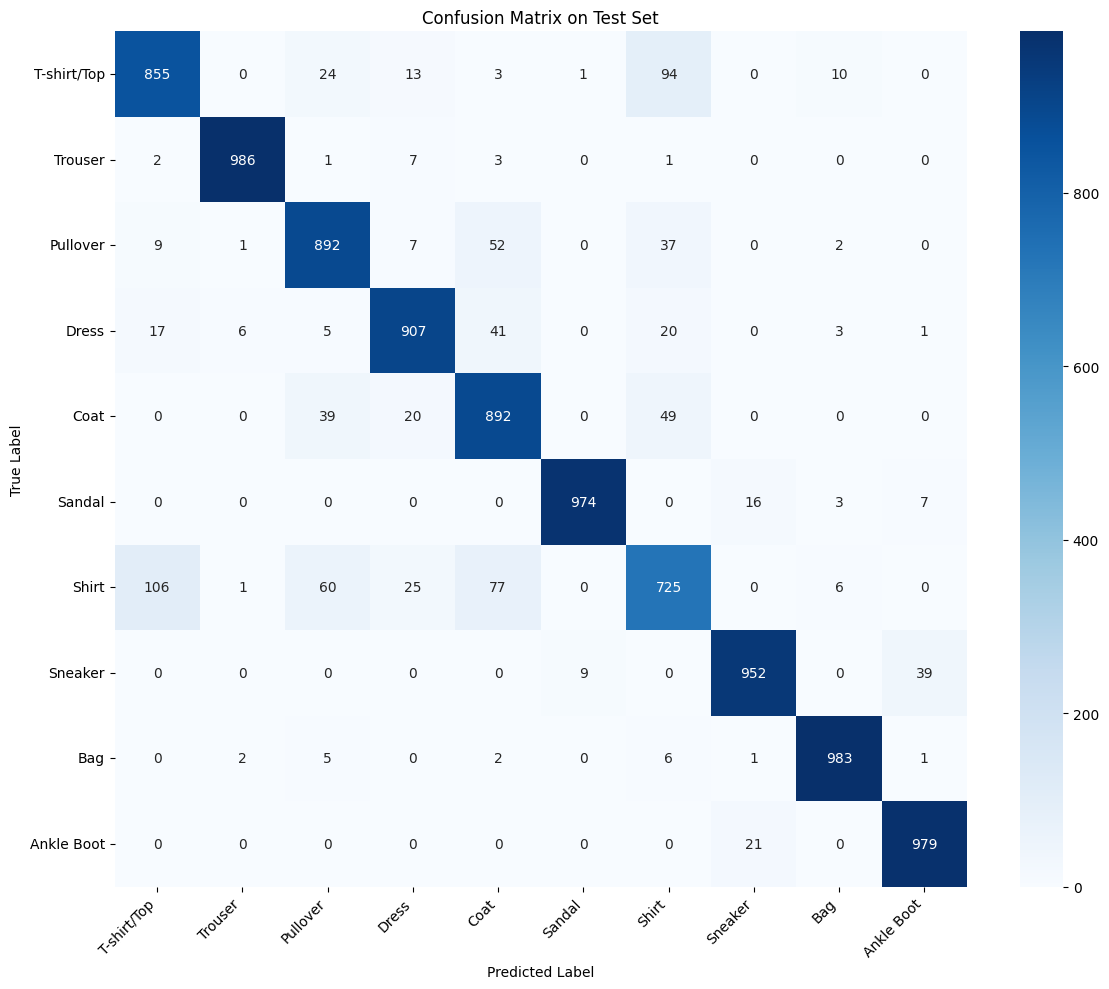


Top Misclassifications:

Top 5 Confusion Pairs:
Shirt predicted as T-shirt/Top: 106 times
T-shirt/Top predicted as Shirt: 94 times
Shirt predicted as Coat: 77 times
Shirt predicted as Pullover: 60 times
Pullover predicted as Coat: 52 times

Per-class Analysis:

T-shirt/Top:
Precision: 86.45%
Recall: 85.50%

Trouser:
Precision: 99.00%
Recall: 98.60%

Pullover:
Precision: 86.94%
Recall: 89.20%

Dress:
Precision: 92.65%
Recall: 90.70%

Coat:
Precision: 83.36%
Recall: 89.20%

Sandal:
Precision: 98.98%
Recall: 97.40%

Shirt:
Precision: 77.79%
Recall: 72.50%

Sneaker:
Precision: 96.16%
Recall: 95.20%

Bag:
Precision: 97.62%
Recall: 98.30%

Ankle Boot:
Precision: 95.33%
Recall: 97.90%


In [ ]:
# Cell 6: Confusion Matrix Analysis
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Create labels for better visualization
class_names = list(class_labels.values())

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate and display most common misclassifications
print("\nTop Misclassifications:")
misclassifications = []
for i in range(10):
    for j in range(10):
        if i != j:  # Skip correct classifications
            misclassifications.append({
                'true': class_names[i],
                'predicted': class_names[j],
                'count': cm[i][j]
            })

# Sort by count and display top 5
misclassifications.sort(key=lambda x: x['count'], reverse=True)
print("\nTop 5 Confusion Pairs:")
for i in range(5):
    misc = misclassifications[i]
    print(f"{misc['true']} predicted as {misc['predicted']}: {misc['count']} times")

# Calculate per-class precision and recall
print("\nPer-class Analysis:")
for i in range(10):
    precision = cm[i][i] / cm[:, i].sum() * 100
    recall = cm[i][i] / cm[i, :].sum() * 100
    print(f"\n{class_names[i]}:")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")